In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import itertools
from networkx.algorithms import community
import operator
from itertools import islice

df = pd.read_excel('players1.xlsx')



In [3]:
#creating edge list - two players have link if they were teammates
edge_list = []

for index, row in df.iterrows():
    current = row
    current_club = row['Club']
    current_season = row['Season']
    current_df = df[df["Season"].isin([current_season])][df["Club"].isin([current_club])]
    current_df = df[(df.Season == current_season) & (df.Club == current_club)]
    arr = np.array(current_df['Name'])

    for i in range(len(arr)):
        try:
            if current['Name'] != arr[i]:
                edge_list.append([current['Name'], arr[i]])
        except: 
            print('e')
            pass


In [4]:
#creating the graph from the edge list
G = nx.Graph()
G.add_edges_from(edge_list)
print('Basic information about the graph:')
print(nx.info(G))


Basic information about the graph:
Name: 
Type: Graph
Number of nodes: 6407
Number of edges: 271083
Average degree:  84.6209


In [5]:
#players with the most and the fewest degrees
degrees = [(node, val) for (node, val) in G.degree()]
degree_table = pd.DataFrame(degrees, columns=['Club','Degree'])
degree_table.sort_values(by=['Degree'], inplace = True, ascending = False)
degree_table.reset_index(drop=True, inplace=True)
degree_table.index += 1
print('Players with the most connections:')
print(degree_table[:20])
print()
print('Players with the fewest connections:')
print(degree_table[-20:])


Players with the most connections:
                 Club  Degree
1        Peter Crouch     486
2       Jermain Defoe     467
3        James Milner     441
4        Wayne Bridge     433
5   Kieran Richardson     430
6     Wayne Routledge     408
7        Robbie Keane     404
8            Joe Cole     402
9       Steve Sidwell     401
10      Craig Bellamy     396
11         Shay Given     387
12      Phil Bardsley     378
13   Daniel Sturridge     374
14       Scott Parker     371
15       Aaron Lennon     371
16   Jermaine Pennant     370
17     Sylvain Distin     366
18       Andy Carroll     365
19      Stuart Taylor     363
20     Paul Konchesky     362

Players with the fewest connections:
                    Club  Degree
6388         Alex Telles      25
6389      Brett Williams      25
6390         Amad Diallo      25
6391         Kerry Dixon      25
6392   Donny van de Beek      25
6393        Paul Moulden      24
6394  Orpheo Keizerweerd      24
6395         Neil Tolson      24


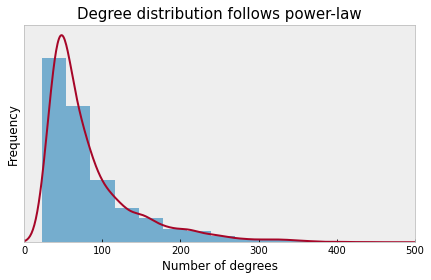

In [6]:
#degree distribution
degree = [G.degree(n) for n in G.nodes()]
degree = pd.DataFrame(degree)
plt.style.use("bmh")
fig, ax = plt.subplots(figsize = (7,4))
degree.plot(ax = ax, kind = 'hist', density = True, alpha = 0.65, bins = 15)
degree.plot(ax = ax, kind = 'kde')
ax.grid(False)
ax.set_xlabel('Number of degrees')
ax.set_xlim(0,500)
ax.set_ylabel('Frequency')
ax.set_yticks([])
ax.get_legend().remove()
ax.set_title('Degree distribution follows power-law', size = 15)

plt.show()


In [7]:
#Average shortest path length
spl = nx.average_shortest_path_length(G)
print("Average shortest path length:", spl)

Average shortest path length: 2.6340145839356452


In [8]:
#Network density
density = nx.density(G)
print("Network density:", density)


Network density: 0.013209629005427983


In [9]:
#Diameter
print("Diameter:", nx.diameter(G))

Diameter: 5


In [10]:
#Triadic closure / clustering coefficient
triadic_closure = nx.transitivity(G)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.4127188496976594


In [11]:
#eigenvectors
eigenvector_dict = nx.eigenvector_centrality(G)
eigenvector_table = pd.DataFrame(eigenvector_dict.items())
eigenvector_table.sort_values(by=[1], inplace = True, ascending = False)
eigenvector_table.reset_index(drop=True, inplace=True)
eigenvector_table.index += 1
print('The most important players according to the eigenvectors:')
print(eigenvector_table[:10])


The most important players according to the eigenvectors:
                    0         1
1        Peter Crouch  0.067364
2       Jermain Defoe  0.067041
3   Kieran Richardson  0.063868
4        Robbie Keane  0.062393
5        James Milner  0.061664
6        Wayne Bridge  0.059563
7       Phil Bardsley  0.059005
8       Craig Bellamy  0.058697
9        Scott Parker  0.055965
10       Aaron Lennon  0.055549


In [12]:
#betweenness
betweenness_dict = nx.betweenness_centrality(G)
betweenness_table = pd.DataFrame(betweenness_dict.items())
betweenness_table.sort_values(by=[1], inplace = True, ascending = False)
betweenness_table.reset_index(drop=True, inplace=True)
betweenness_table.index += 1
print('The most important players according to betweenness:')
print(betweenness_table[:10])




The most important players according to betweenness:
                  0         1
1     Jermain Defoe  0.008992
2      James Milner  0.008957
3      Peter Crouch  0.008302
4    Richard Wright  0.008141
5    Mark Schwarzer  0.007800
6      Wayne Bridge  0.007426
7   Wayne Routledge  0.007190
8     Steve Sidwell  0.006449
9     Frank Lampard  0.006196
10       Carlo Nash  0.006052


In [13]:
#teammates
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        to_check = str([item[0], item[1]])
        if (to_check in freq):
            freq[to_check] += 1
        else:
            freq[to_check] = 1

    sorted_freq = dict( sorted(freq.items(), key=operator.itemgetter(1),reverse=True))
    n_items = take(200, sorted_freq.items())
    n_items = n_items[:100:2]
    n_items = pd.DataFrame(n_items, columns = ['Players', 'Weight'])
    n_items.reset_index(drop = True, inplace=True)
    n_items.index += 1
    print(n_items)

CountFrequency(edge_list)


                                      Players  Weight
1              ['Ryan Giggs', 'Paul Scholes']      21
2              ['Ryan Giggs', 'Gary Neville']      19
3              ['Gary Neville', 'Ryan Giggs']      19
4                ['Wes Brown', "John O'Shea"]      18
5              ['Tony Hibbert', 'Leon Osman']      17
6       ['Jamie Carragher', 'Steven Gerrard']      15
7           ['Ryan Giggs', 'Darren Fletcher']      14
8                 ['Wes Brown', 'Ryan Giggs']      14
9               ['Wes Brown', 'Gary Neville']      14
10              ['Paul Scholes', 'Wes Brown']      14
11            ['John Terry', 'Frank Lampard']      13
12        ['Paul Scholes', 'Darren Fletcher']      13
13              ['Gary Neville', 'Roy Keane']      13
14              ['Paul Scholes', 'Roy Keane']      13
15                ['Roy Keane', 'Ryan Giggs']      13
16      ['Leighton Baines', 'Séamus Coleman']      12
17       ['Leighton Baines', 'Phil Jagielka']      12
18            ['James Collin

In [14]:
#players at one club
print("Longest serving players at one club:")
print(df[['Name', 'Club']].value_counts()[:25])

Longest serving players at one club:
Name             Club             
Ryan Giggs       Manchester United    22
Paul Scholes     Manchester United    21
John Terry       Chelsea              20
Gary Neville     Manchester United    19
Jamie Carragher  Liverpool            19
Steve Harper     Newcastle United     18
Tony Hibbert     Everton              17
Leon Osman       Everton              17
Steven Gerrard   Liverpool            17
Darren Fletcher  Manchester United    15
Mark Noble       West Ham United      15
Ledley King      Tottenham Hotspur    14
Wes Brown        Manchester United    14
Wayne Rooney     Manchester United    13
Theo Walcott     Arsenal              13
Shola Ameobi     Newcastle United     13
Roy Keane        Manchester United    13
Jason Dodd       Southampton          13
Lee Hendrie      Aston Villa          13
Séamus Coleman   Everton              13
Leighton Baines  Everton              13
Steven Taylor    Newcastle United     13
Michael Carrick  Mancheste

In [15]:
#Players with the most clubs
print("Players with the most clubs:")
most_clubs = df[['Name', 'Club']].groupby("Name").nunique()
print(most_clubs.sort_values("Club",ascending = False)[:25])

Players with the most clubs:
                   Club
Name                   
Marcus Bent           8
Carlo Nash            7
Steve Sidwell         7
Tal Ben Haim          7
Craig Bellamy         7
Wayne Routledge       7
Nigel Quashie         7
Peter Crouch          7
Andrew Cole           7
Les Ferdinand         6
Stan Collymore        6
Steven Caulker        6
Robbie Keane          6
Wayne Bridge          6
Danny Mills           6
Joleon Lescott        6
Darren Bent           6
Nick Barmby           6
Kieran Richardson     6
Nicolas Anelka        6
Paul Konchesky        6
Patrick Bamford       6
Louis Saha            6
Scott Parker          6
Scott Sinclair        6


In [16]:
#Clubs with the most players
print("Clubs with the most players:")
most_man = df[['Club', 'Name']].groupby('Club').nunique()
print(most_man.sort_values("Name", ascending = False))

Clubs with the most players:
                          Name
Club                          
West Ham United            393
Manchester City            378
Liverpool                  370
Chelsea                    345
Aston Villa                344
Tottenham Hotspur          340
Everton                    332
Newcastle United           326
Arsenal                    325
Sunderland                 313
Manchester United          311
Southampton                296
Fulham                     277
Crystal Palace             250
Leicester City             248
Blackburn Rovers           243
West Bromwich Albion       238
Middlesbrough              218
Bolton Wanderers           217
Norwich City               214
Wolverhampton Wanderers    196
Leeds United               182
Watford                    180
Portsmouth                 157
Sheffield United           150
Birmingham City            149
Queens Park Rangers        148
Stoke City                 136
Hull City                  134
Coventry C

In [17]:
#Nationalities with the most players
print("Nationalities with the most players:")
most_nat = df[['Nationality', 'Name']].groupby('Nationality').nunique()
print(most_nat.sort_values("Name", ascending = False)[:20])

Nationalities with the most players:
                  Name
Nationality           
England           2724
Ireland            294
Scotland           291
France             259
Wales              190
Spain              178
Netherlands        166
Northern Ireland   113
Brazil             105
Portugal           104
Italy              101
Germany             92
Australia           90
Sweden              89
Norway              88
Argentina           81
Denmark             80
Belgium             76
United States       64
Nigeria             53
